In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import cv2
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf
print(tf.__version__)

2.3.0


(224, 224, 3)


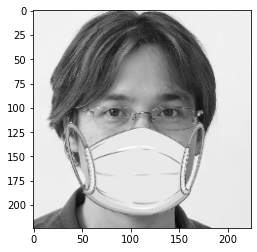

(224, 224, 3)


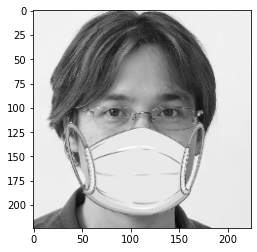

(224, 224, 3)


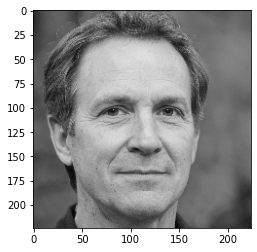

(224, 224, 3)


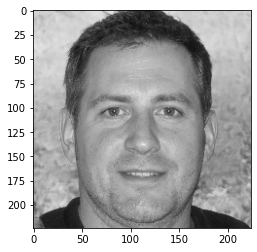

In [3]:
maskimg=cv2.imread('/kaggle/input/facemask-detection-dataset-20000-images/new_with_mask/with-mask-default-mask-seed0002.png')
cvt_maskimg=cv2.cvtColor(maskimg,cv2.COLOR_BGR2RGB)
print(maskimg.shape)
plt.imshow(cvt_maskimg)
plt.show()

maskimg=cv2.imread('/kaggle/input/facemask-detection-dataset-20000-images/new_with_mask/with-mask-default-mask-seed0002.png')
cvt_maskimg=cv2.cvtColor(maskimg,cv2.COLOR_BGR2RGB)
print(maskimg.shape)
plt.imshow(cvt_maskimg)
plt.show()

maskimg=cv2.imread('/kaggle/input/facemask-detection-dataset-20000-images/new_without_mask/seed0008.png')
cvt_maskimg=cv2.cvtColor(maskimg,cv2.COLOR_BGR2RGB)
print(maskimg.shape)
plt.imshow(cvt_maskimg)
plt.show()

maskimg=cv2.imread('/kaggle/input/facemask-detection-dataset-20000-images/new_without_mask/seed0023.png')
cvt_maskimg=cv2.cvtColor(maskimg,cv2.COLOR_BGR2RGB)
print(maskimg.shape)
plt.imshow(cvt_maskimg)
plt.show()

# **Image Generators**

In [4]:
DataGen=tf.keras.preprocessing.image.ImageDataGenerator(
                                                            rescale=1/255.0,
                                                            zoom_range=0.2,
                                                            rotation_range=20,
                                                            height_shift_range=0.2,
                                                            width_shift_range=0.2,
                                                            horizontal_flip=True,
                                                            validation_split=0.2
                                                       )

TrainDataGen=DataGen.flow_from_directory(
                        '/kaggle/input/facemask-detection-dataset-20000-images/',
                        subset='training',
                        target_size=(224,224),
                        batch_size=128,
                        seed=29
                    )


ValidDataGen=DataGen.flow_from_directory(
                        '/kaggle/input/facemask-detection-dataset-20000-images/',
                        subset='validation',
                        target_size=(224,224),
                        batch_size=128,
                        seed=29
                    )


# TestDataGen=DataGen.flow_from_directory(
#                         '/kaggle/input/facemaskdetection/Dataset/test/test/',
#                         batch_size=32,
#                         target_size=(140,110),
#                         seed=29
#                     )


Found 16000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.


# **Model**

In [5]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout,BatchNormalization

In [30]:
class my_callback(tf.keras.callbacks.Callback):
    
    def on_epoch_end(self,epoch,logs={}):
        
        if(logs['val_accuracy'] >= 0.99):
            self.model.stop_training=True

val_earlystopping=my_callback()

In [31]:
model=Sequential()

model.add(Conv2D(2,3,activation='relu',input_shape=(224,224,3)))
model.add(MaxPooling2D((2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(10,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(2,activation='softmax',))

In [32]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 222, 222, 2)       56        
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 111, 111, 2)       0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 111, 111, 2)       8         
_________________________________________________________________
dropout_10 (Dropout)         (None, 111, 111, 2)       0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 24642)             0         
_________________________________________________________________
dense_10 (Dense)             (None, 16)                394288    
_________________________________________________________________
dropout_11 (Dropout)         (None, 16)               

In [33]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),metrics=['accuracy'],loss='binary_crossentropy')

In [ ]:
history=model.fit(TrainDataGen,epochs=10,validation_data=ValidDataGen,callbacks=[val_earlystopping])

Epoch 1/10
125/125 [==============================] - 251s 2s/step - loss: 0.5212 - accuracy: 0.7620 - val_loss: 0.5013 - val_accuracy: 0.8827
Epoch 2/10
125/125 [==============================] - 251s 2s/step - loss: 0.3190 - accuracy: 0.8605 - val_loss: 1.1257 - val_accuracy: 0.5050
Epoch 3/10
125/125 [==============================] - 252s 2s/step - loss: 0.2433 - accuracy: 0.8932 - val_loss: 2.4088 - val_accuracy: 0.5000
Epoch 4/10
125/125 [==============================] - 250s 2s/step - loss: 0.1804 - accuracy: 0.9186 - val_loss: 3.3324 - val_accuracy: 0.5000
Epoch 5/10
  7/125 [>.............................] - ETA: 2:51 - loss: 0.1508 - accuracy: 0.9364

In [ ]:
#print('Test Accuracy : ',sum(TestDataGen.classes==np.argmax(model.predict(TestDataGen),axis=1))/len(TestDataGen.classes))